<a href="https://colab.research.google.com/github/ODARI-CHARLES1/ColabNotebooks/blob/main/DecisionTrees%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pathlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
pip install opendatasets

### Loading the dataset...

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DataSource/wearable_health_devices_performance_upto_26june2025.csv')
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: odarikibisicharles
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 676MB/s]

In [ ]:
df=pd.read_csv('/content/weather-dataset-rattle-package/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [ ]:
from google.colab import sheets
sheet=sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1SpZ_Nt7xR1drAeHnkWBTfVMyqwbAWHCdT-h-jLSYT84/edit#gid=0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df['RainTomorrow'].isnull().sum()


np.int64(3267)

In [ ]:
## drop all rows with nan values
df.dropna(subset=['RainTomorrow'],inplace=True)
df['RainTomorrow'].isnull().sum()

np.int64(0)

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

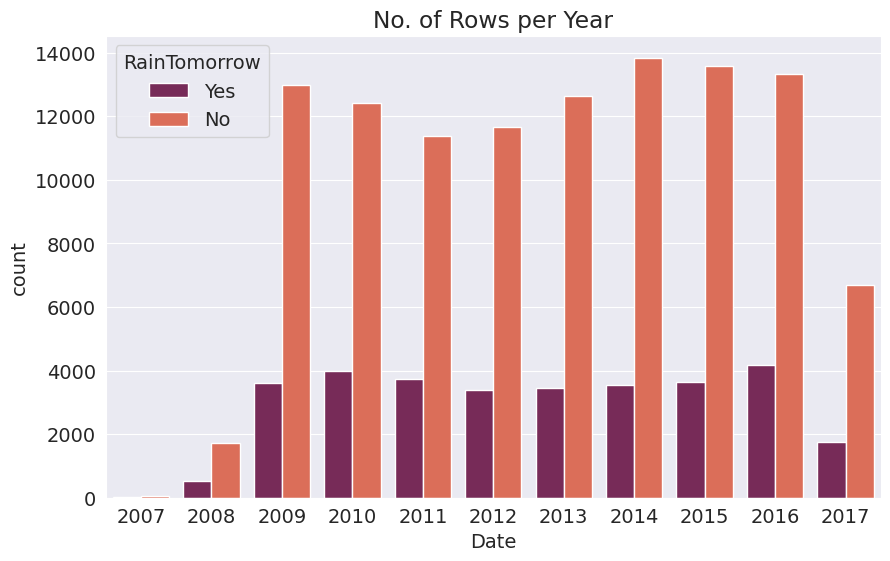

In [ ]:
plt.title('No. of Rows per Year');
sns.countplot(data=df,x=pd.to_datetime(df.Date).dt.year,hue='RainTomorrow',palette='rocket');

##Spiliting of data based on time..year

In [ ]:
year=pd.to_datetime(df['Date']).dt.year;
train_df=df[year<2015];
val_df=df[year==2015];
test_df=df[year>2015];

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [ ]:
input_cols=train_df.columns[1:-1].tolist()
target_cols='RainTomorrow'

train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [ ]:
imputer=SimpleImputer(strategy='mean').fit(df[numerical_cols])

train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.transform(val_df[numerical_cols])
test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])

In [ ]:
#checking if numerical_cols have null values
train_inputs[numerical_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling numerical data...

In [ ]:
scaler=MinMaxScaler().fit(df[numerical_cols])
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

#Encoding categorical columns

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])
val_inputs.to_csv('val_inputs.csv',index=False)
test_inputs.to_csv('test_inputs.csv',index=False)

In [ ]:
train_inputs.isnull().sum()
train_inputs.describe()
train_inputs.to_csv('TrainData.csv',index=False)


# Combining the numerical_cols and categorical_cols together....


In [ ]:
X_train=train_inputs[numerical_cols +encoded_cols]
X_val=val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]

# Illustration of the DecisionTreeClassifier Operation..........

![Decision Tree Illustrations](https://i.imgur.com/qSH4lqz.png)

In [ ]:
model=DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

#Predicition ......

In [ ]:
train_preds=model.predict(X_train)

In [ ]:
pd.value_counts(model.predict(X_train))

/tmp/ipython-input-27-4076448990.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.predict(X_train))


No     76707
Yes    22281
Name: count, dtype: int64

# Metrics of the model

In [ ]:
#Based on train_train and train_inputs
accuracy_score(train_targets,train_preds)

0.9999797955307714

In [ ]:
#Based on val_targets and val_inputs
accuracy_score(val_targets,model.predict(X_val))

0.7921188555510418

# Plot the Tree

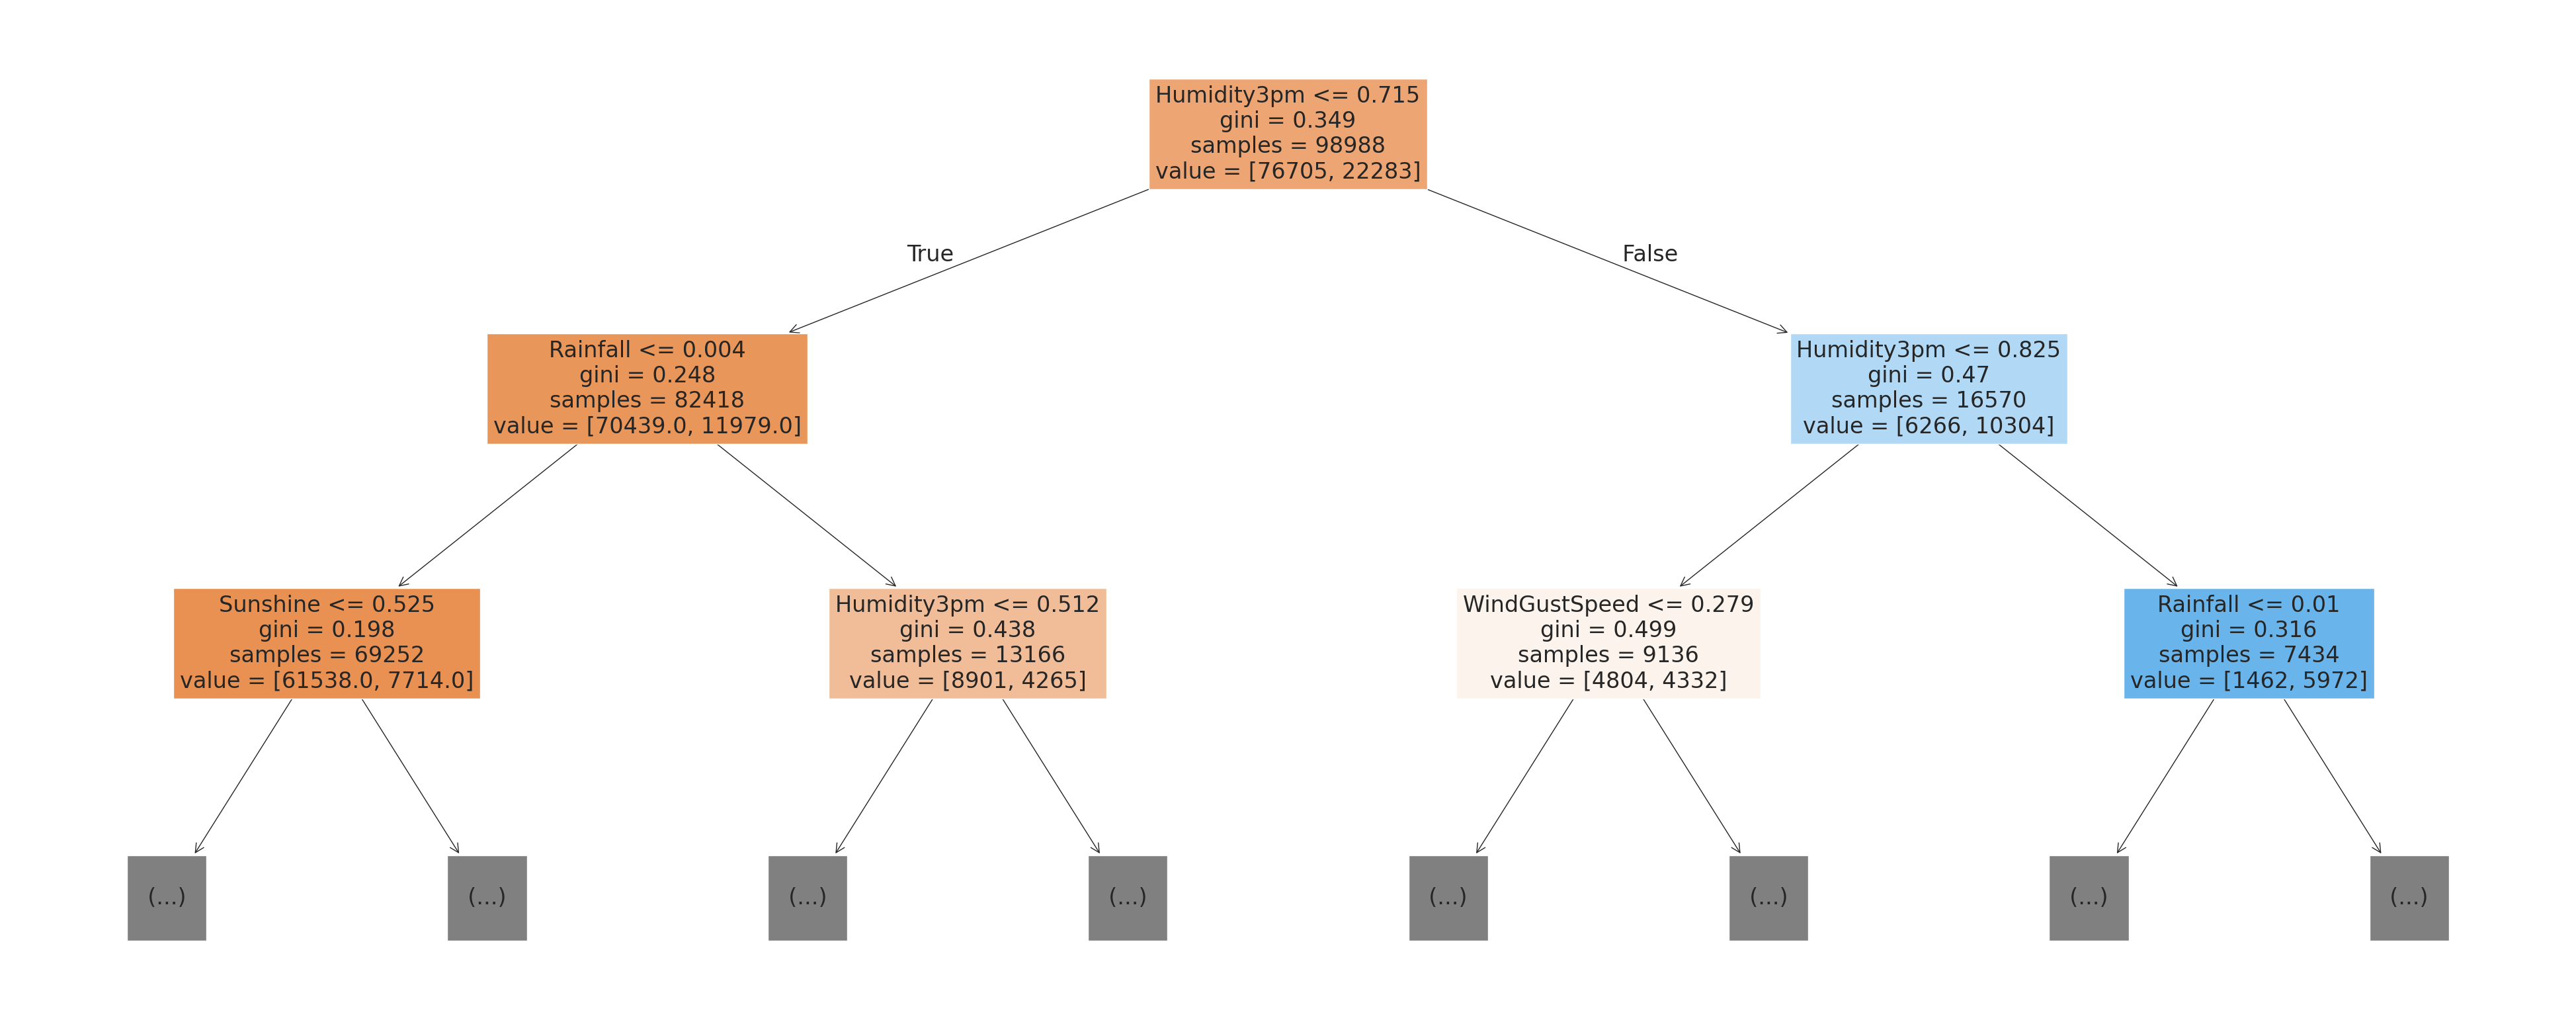

In [ ]:
plt.figure(figsize=(50,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
tree_text=export_text(model,max_depth=10,feature_names=list(X_train.columns))
print(tree_text)